<a href="https://colab.research.google.com/github/dejavuu009/data-science-projects/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
data = {
    'gender': ['Female', 'Male', 'Female', 'Male', 'Male'],
    'SeniorCitizen': [0, 1, 0, 0, 1],
    'Partner': ['Yes', 'No', 'No', 'Yes', 'No'],
    'Dependents': ['No', 'No', 'Yes', 'No', 'No'],
    'tenure': [1, 34, 2, 45, 5],
    'PhoneService': ['No', 'Yes', 'Yes', 'Yes', 'Yes'],
    'InternetService': ['DSL', 'Fiber optic', 'DSL', 'Fiber optic', 'DSL'],
    'MonthlyCharges': [29.85, 56.95, 53.85, 42.30, 70.70],
    'TotalCharges': [29.85, 1889.50, 108.15, 1840.75, 151.65],
    'Churn': ['No', 'No', 'Yes', 'No', 'Yes']
}



In [6]:
df = pd.DataFrame(data)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,DSL,29.85,29.85,No
1,Male,1,No,No,34,Yes,Fiber optic,56.95,1889.50,No
2,Female,0,No,Yes,2,Yes,DSL,53.85,108.15,Yes
3,Male,0,Yes,No,45,Yes,Fiber optic,42.30,1840.75,No
4,Male,1,No,No,5,Yes,DSL,70.70,151.65,Yes


In [ ]:
## Data Preprocessing
# I will remove unnecessary columns and prepare the dataset for training a machine learning model.


In [7]:
df_processed = pd.get_dummies(df, drop_first=True)

In [8]:
df_processed.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,InternetService_Fiber optic,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,False,False
1,1,34,56.95,1889.50,True,False,False,True,True,False
2,0,2,53.85,108.15,False,False,True,True,False,True
3,0,45,42.30,1840.75,True,True,False,True,True,False
4,1,5,70.70,151.65,True,False,False,True,False,True


In [9]:
X = df_processed.drop('Churn_Yes', axis=1)
y = df_processed['Churn_Yes']

In [10]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,InternetService_Fiber optic
0,0,1,29.85,29.85,False,True,False,False,False
1,1,34,56.95,1889.50,True,False,False,True,True
2,0,2,53.85,108.15,False,False,True,True,False
3,0,45,42.30,1840.75,True,True,False,True,True
4,1,5,70.70,151.65,True,False,False,True,False


In [11]:
y.head()

,Churn_Yes
0,False
1,False
2,True
3,False
4,True


In [12]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [13]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix, classification_report

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, predictions))


Confusion Matrix:
[[1 0]
 [0 1]]

Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00         1
        True       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



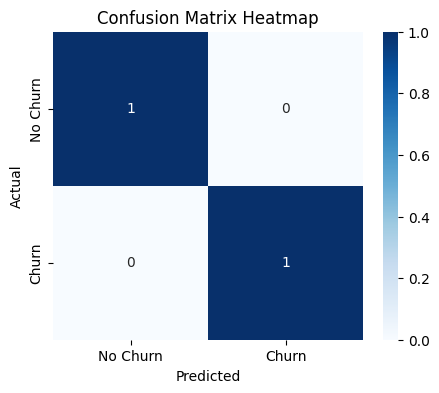

In [15]:
cm = confusion_matrix(y_test, predictions)

# Narysuj heatmapę
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()